# Heart Failure Prediction and Precaution

Cardiovascular diseases (CVDs) are the #1 cause of death globally, accounting for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 12 variables that can be used to predict a possible heart disease (supervised) or generate precautionary advices for high-risk cohort by exploring latent correlations among features/label (unsupervised).

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and recommendation wherein a machine learning model can be of great help.

### Variables Information

| Feature | Description |
| :- | :- |
| Age | age of the patient [years]
| Sex | sex of the patient [M: Male, F: Female]
| ChestPainType | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
| RestingBP | resting blood pressure [mm Hg]
| Cholesterol | serum cholesterol [mm/dl]
| FastingBS | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
| RestingECG | resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
| MaxHR | maximum heart rate achieved [Numeric value between 60 and 202]
| ExerciseAngina | exercise-induced angina [Y: Yes, N: No]
| Oldpeak | oldpeak = ST [Numeric value measured in depression]
| ST_Slope | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
| HeartDisease | output class [1: heart disease, 0: Normal]

## Import libraries & dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(123)   # For reproducibility

In [3]:
df = pd.read_csv('./heart.csv')
display(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
sum(df['HeartDisease']==0)

410

### Check duplicate and null values

In [5]:
print('Number of Duplicates:', sum(df.duplicated()==True))
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 0


## Exploratory Data Analysis

In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Note: FastingBS and HeartDisease are binary features [0, 1], so they can be transformed into categorical variables for EDA only.

In [7]:
df['FastingBS'] = df['FastingBS'].astype(str)
# df['HeartDisease'] = df['HeartDisease'].astype(str)

Rename some features and values to be more readable for EDA.

In [8]:
df.loc[df['HeartDisease'] == 1, 'HeartDisease'] = 'ill' 
df.loc[df['HeartDisease'] == 0, 'HeartDisease'] = 'healthy' 
df.loc[df['Sex'] == 'M', 'Sex'] = 'Male'
df.loc[df['Sex'] == 'F', 'Sex'] = 'Female' 
df.loc[df['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 'Yes'
df.loc[df['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 'No' 

In [9]:
df.select_dtypes(include=object).astype("category")

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,Male,ATA,0,Normal,No,Up,healthy
1,Female,NAP,0,Normal,No,Flat,ill
2,Male,ATA,0,ST,No,Up,healthy
3,Female,ASY,0,Normal,Yes,Flat,ill
4,Male,NAP,0,Normal,No,Up,healthy
...,...,...,...,...,...,...,...
913,Male,TA,0,Normal,No,Flat,ill
914,Male,ASY,1,Normal,No,Flat,ill
915,Male,ASY,0,Normal,Yes,Flat,ill
916,Female,ATA,0,LVH,No,Flat,ill


In [10]:
df.select_dtypes(include=object)

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,Male,ATA,0,Normal,No,Up,healthy
1,Female,NAP,0,Normal,No,Flat,ill
2,Male,ATA,0,ST,No,Up,healthy
3,Female,ASY,0,Normal,Yes,Flat,ill
4,Male,NAP,0,Normal,No,Up,healthy
...,...,...,...,...,...,...,...
913,Male,TA,0,Normal,No,Flat,ill
914,Male,ASY,1,Normal,No,Flat,ill
915,Male,ASY,0,Normal,Yes,Flat,ill
916,Female,ATA,0,LVH,No,Flat,ill


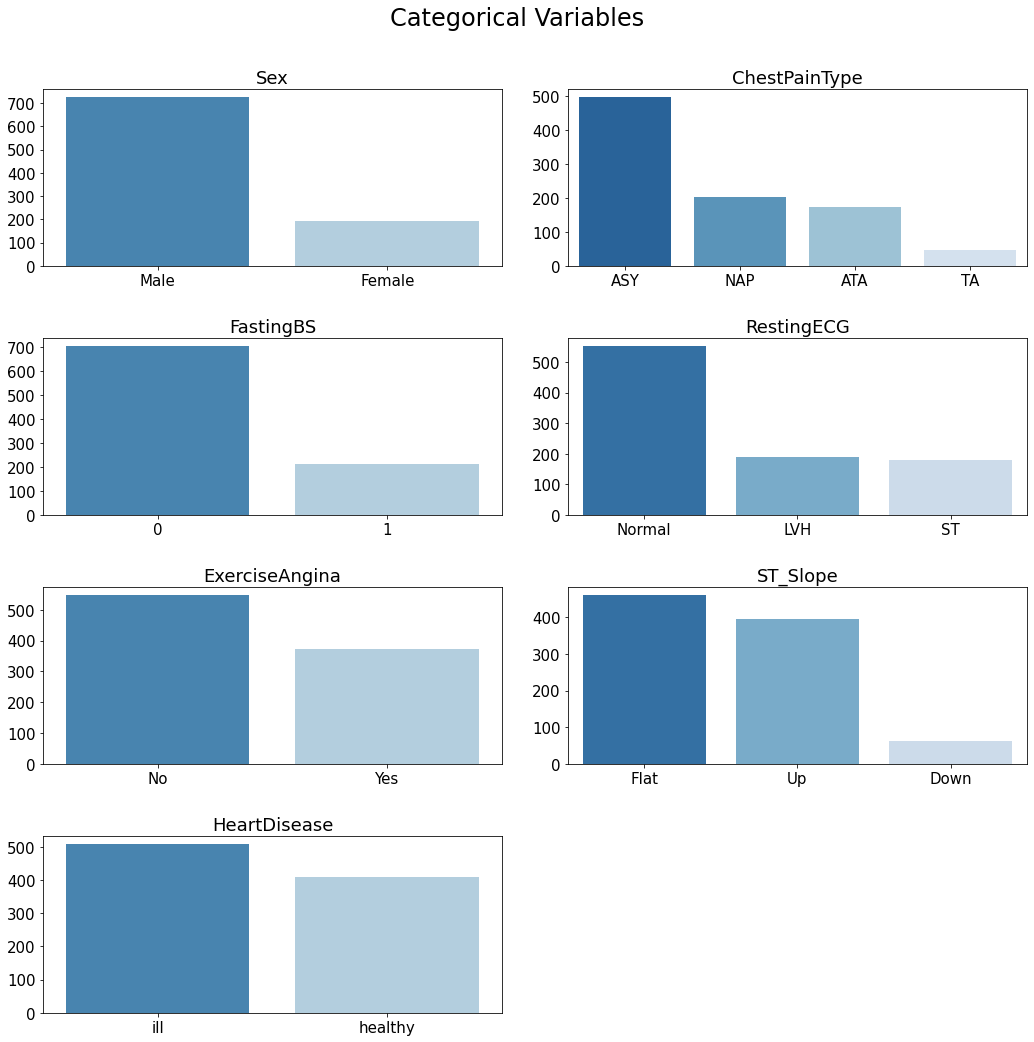

In [11]:
# Select categorical variables
cat_var = df.select_dtypes(include=object).columns

fig, ax = plt.subplots(figsize=(15,15))
# plt.figure(figsize=(15, 15))

# loop through columns
for i in enumerate(cat_var):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(x = i[1], data = df, order=df[i[1]].value_counts().index, palette='Blues_r')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(i[1], fontsize=18)
    plt.tight_layout(pad=3.0)
    plt.suptitle('Categorical Variables', fontsize=24)

Note: The lable, **HeartDisease**, has a relatively balanced distribution.

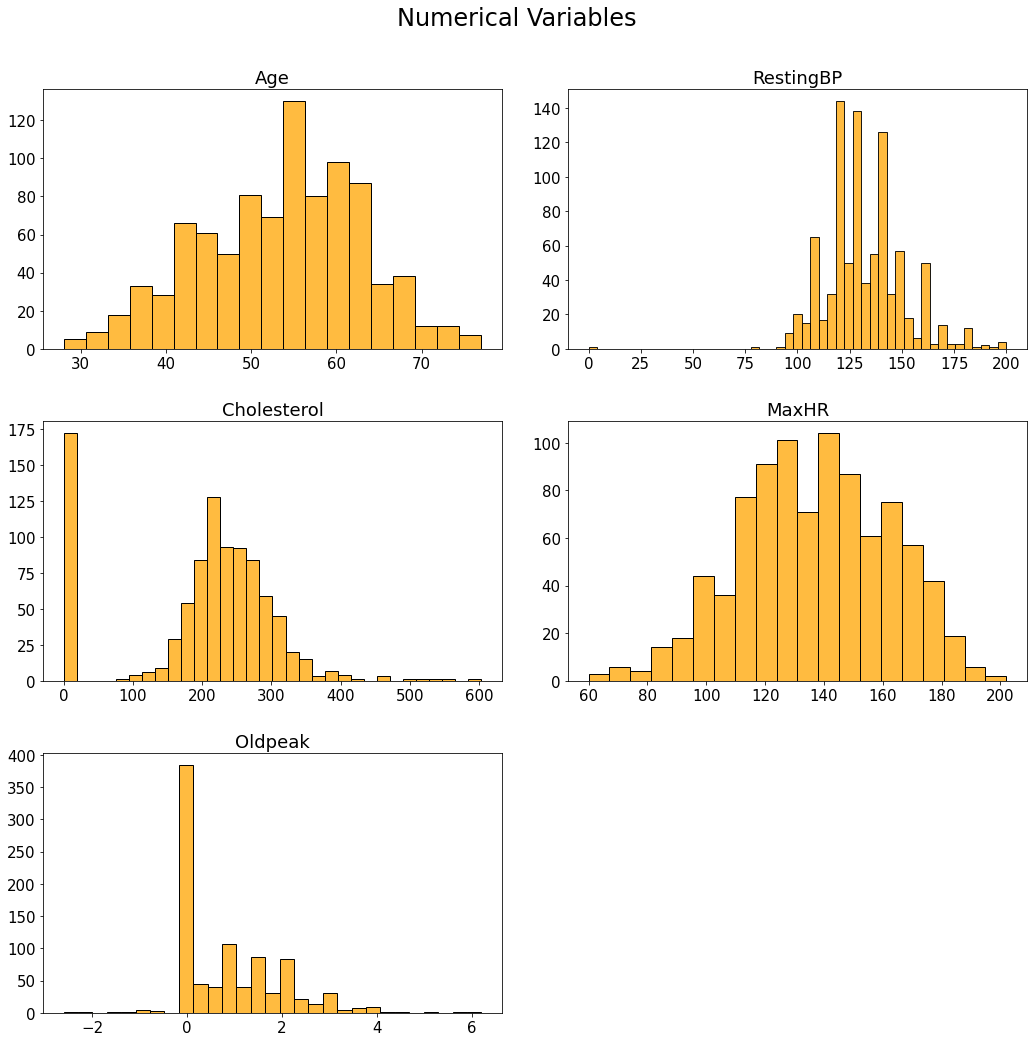

In [12]:
# Select numerical variables
num_var = df.select_dtypes(exclude=object).columns

fig = plt.subplots(figsize=(15,15))

# loop through columns
for i in enumerate(num_var):
    plt.subplot(3, 2, i[0]+1)
    sns.histplot(x = i[1], data = df, color="Orange")
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(i[1], fontsize=18)
    plt.tight_layout(pad=3.0)
    plt.suptitle('Numerical Variables', fontsize=24)

Note: Numerical variables have outliers which will be checked afterwards.

## Data Preprocessing
### Numerical Variables Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

for i in num_var:
    df[i] = MinMaxScaler().fit_transform(df[[i]])

### Outlier Handling

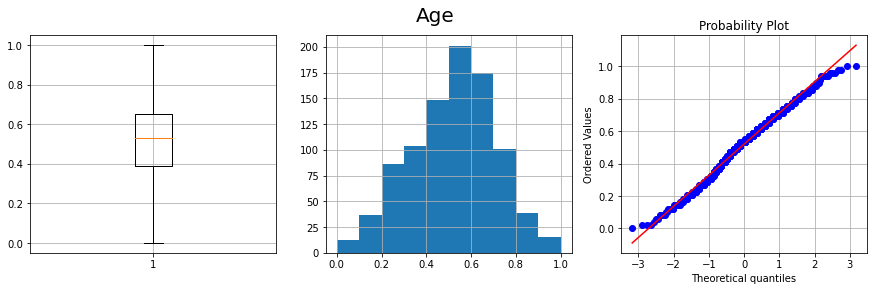

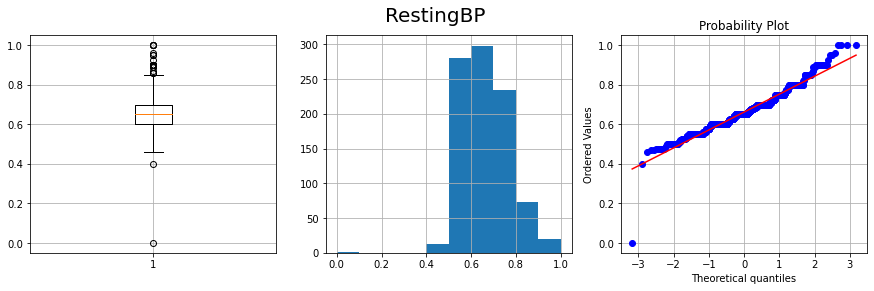

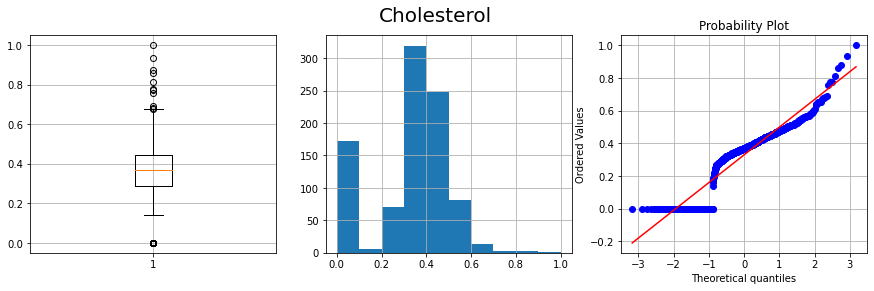

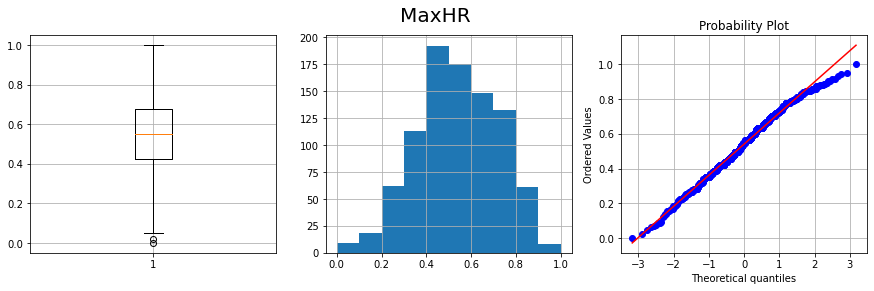

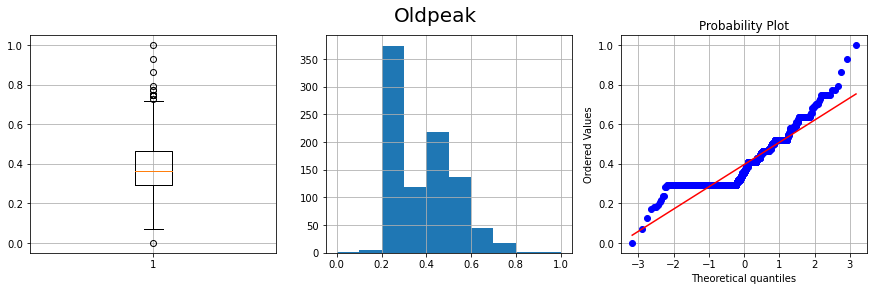

In [14]:
import scipy.stats as stats

for col in num_var:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    fig.suptitle(col, fontsize=20)
    axes[0].boxplot(df[col])                             # boxplot
    axes[1].hist(df[col])                                # histogram
    stats.probplot(df[col], dist='norm', plot=axes[2])   # probability plot
    axes[0].grid()
    axes[1].grid() 
    axes[2].grid() 
 
plt.show()   

**RestingBP** outliers removing

In [15]:
q1 = df['RestingBP'].quantile(0.25)
q3 = df['RestingBP'].quantile(0.75)
iqr = q3-q1
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

df = df[(df['RestingBP'] >= min_limit) & (df['RestingBP'] <= max_limit)]
# df.reset_index()

**Cholesterol** outliers investigation for large amount

In [16]:
# number of rows with 'Cholesterol' = 0
print('Number of rows with "Cholesterol" = 0 : ' + str(len(df[(df['Cholesterol']==0)])))

Number of rows with "Cholesterol" = 0 : 164


In [19]:
# number of rows with 'Cholesterol' = 0 and HeartDisease
print('Number of rows with "Cholesterol" = 0 and HeartDisease : ' + str(len(df[(df['Cholesterol']==0) & (df['HeartDisease']=='ill')])))

Number of rows with "Cholesterol" = 0 and HeartDisease : 146


Comparing two values above, I noticed that most people whose Cholesterol is zero (scaled) has the heart disease, namely ill. Hence, I decide to keep the zeros and only remove the upper outliers.

In [20]:
q1 = df['Cholesterol'].quantile(0.25)
q3 = df['Cholesterol'].quantile(0.75)
iqr = q3-q1
#min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

df = df[(df['Cholesterol'] <= max_limit)]
# df.reset_index()

**MaxHR** outliers removing

In [21]:
q1 = df['MaxHR'].quantile(0.25)
q3 = df['MaxHR'].quantile(0.75)
iqr = q3-q1
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

df = df[(df['MaxHR'] >= min_limit) & (df['MaxHR'] <= max_limit)]
# df.reset_index()

**Oldpeak** outliers removing

In [22]:
q1 = df['Oldpeak'].quantile(0.25)
q3 = df['Oldpeak'].quantile(0.75)
iqr = q3-q1
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

df = df[(df['Oldpeak'] >= min_limit) & (df['Oldpeak'] <= max_limit)]
# df.reset_index()

Change **FastingBS** and **HeartDisease** back to numerical variables.

In [23]:
df['FastingBS'] = df['FastingBS'].astype(int)
df.loc[df['HeartDisease']=='ill', 'HeartDisease'] = 1
df.loc[df['HeartDisease'] == 'healthy', 'HeartDisease'] = 0 
df['HeartDisease'] = df['HeartDisease'].astype(int)

In [24]:
df = df.reset_index(drop=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,Male,ATA,0.70,0.479270,0,Normal,0.788732,No,0.295455,Up,0
1,0.428571,Female,NAP,0.80,0.298507,0,Normal,0.676056,No,0.409091,Flat,1
2,0.183673,Male,ATA,0.65,0.469320,0,ST,0.267606,No,0.295455,Up,0
3,0.408163,Female,ASY,0.69,0.354892,0,Normal,0.338028,Yes,0.465909,Flat,1
4,0.530612,Male,NAP,0.75,0.323383,0,Normal,0.436620,No,0.295455,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.346939,Male,TA,0.55,0.437811,0,Normal,0.507042,No,0.431818,Flat,1
858,0.816327,Male,ASY,0.72,0.320066,1,Normal,0.570423,No,0.681818,Flat,1
859,0.591837,Male,ASY,0.65,0.217247,0,Normal,0.387324,Yes,0.431818,Flat,1
860,0.591837,Female,ATA,0.65,0.391376,0,LVH,0.802817,No,0.295455,Flat,1


# Supervised Learning
The task is to predict a possible **heart disease** (label), which is a **classification** problem, by using 11 features.

In supervised learning, I will implement three methods:
1. Logistic Regression
2. Random Forest
3. AdaBoost

In [25]:
df1 = df.copy()

### Encoding Categorical Variables

In [26]:
cat_var = df1.select_dtypes(include=object).columns

# # one-hot encoding
# df1 = pd.get_dummies(df1, columns=cat_var)  
# df1.head()

# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df1[cat_var] = enc.fit_transform(df1[cat_var])

### Normalization of encoded categorical variables

In [27]:
for i in cat_var:
    df1[i] = MinMaxScaler().fit_transform(df1[[i]])
    
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0,0.5,0.788732,0.0,0.295455,1.0,0
1,0.428571,0.0,0.666667,0.80,0.298507,0,0.5,0.676056,0.0,0.409091,0.5,1
2,0.183673,1.0,0.333333,0.65,0.469320,0,1.0,0.267606,0.0,0.295455,1.0,0
3,0.408163,0.0,0.000000,0.69,0.354892,0,0.5,0.338028,1.0,0.465909,0.5,1
4,0.530612,1.0,0.666667,0.75,0.323383,0,0.5,0.436620,0.0,0.295455,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.346939,1.0,1.000000,0.55,0.437811,0,0.5,0.507042,0.0,0.431818,0.5,1
858,0.816327,1.0,0.000000,0.72,0.320066,1,0.5,0.570423,0.0,0.681818,0.5,1
859,0.591837,1.0,0.000000,0.65,0.217247,0,0.5,0.387324,1.0,0.431818,0.5,1
860,0.591837,0.0,0.333333,0.65,0.391376,0,0.0,0.802817,0.0,0.295455,0.5,1


### Correlation Matrix

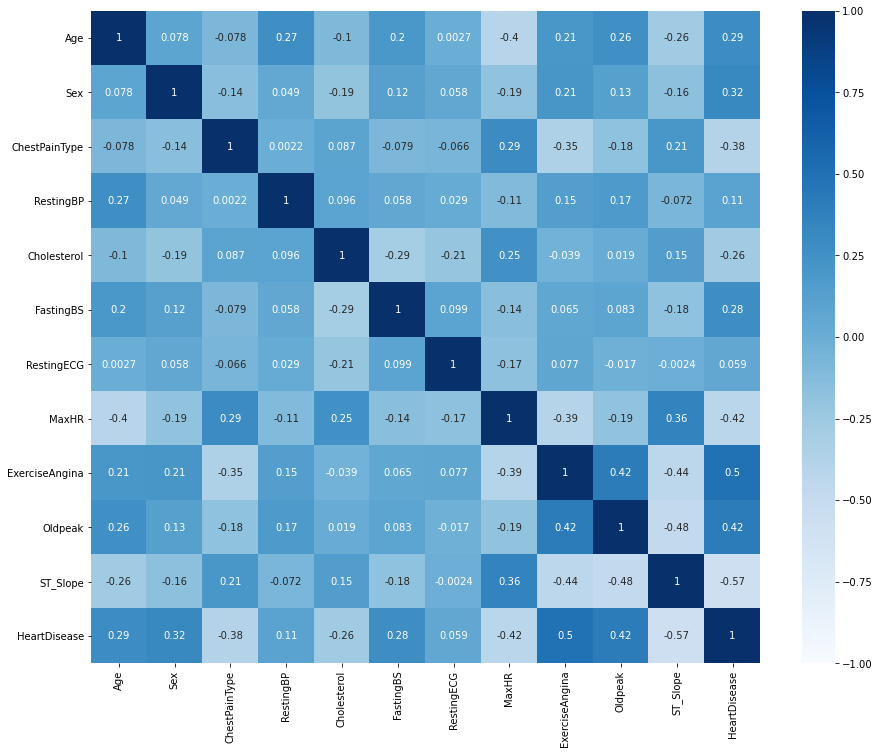

In [28]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

*0.0 &nbsp; ≤ &nbsp; r &nbsp; < &nbsp; 0.3  &nbsp;       None or very weak*  
*0.3 &nbsp; ≤ &nbsp; r &nbsp; < &nbsp; 0.5  &nbsp;       Weak*  
*0.5 &nbsp; ≤ &nbsp; r &nbsp; < &nbsp; 0.7  &nbsp;       Moderate*  
*0.7 &nbsp; ≤ &nbsp; r &nbsp; ≤ &nbsp; 1.0    &nbsp;     Strong*

We can see that most correlations among continuous features are weak or very weak. Only one correlation between ST_slope and HeartDisease is moderate, but it is not large enough to replace any one by the other.

### Spliting Data into Train and Test sets

In [29]:
from sklearn.model_selection import train_test_split

X = df1.drop('HeartDisease',axis=1)
y = df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=123)

### Cross Validation is set to 5 fold for all three methods.

## 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score

L1 regularized logistic regression (Lasso regression)

In [25]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=123).fit(X_train, y_train)
y_pred = lr_l1.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy score:  0.861271676300578
F1 Score:  0.870967741935484


L2 regularized logistic regression (Ridge regression)

In [26]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', random_state=123).fit(X_train, y_train)
y_pred = lr_l2.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy score:  0.8497109826589595
F1 Score:  0.858695652173913


## 2. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 150, 200], 
          'max_features': ['auto', 'sqrt'],
          'max_depth': [15, 20, 25, None], 
          'min_samples_split': [5, 10, 15],
          'min_samples_leaf': [1, 2], 
          'bootstrap': [True, False]}

rfc = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = params,
                           scoring = 'f1',
                           cv = 5,
                           verbose=False, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print("best score: ", grid_search.best_score_)
print("best param: ", grid_search.best_params_)

best score:  0.8932399245239534
best param:  {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 150}


In [28]:
best_params = grid_search.best_params_
rfc = RandomForestClassifier(random_state=123, **best_params)
                            
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy score:  0.861271676300578
F1 Score:  0.8723404255319149


## 3. AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=123))

params = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
          'n_estimators':[80, 100, 120, 140, 160]}

grid_search2 = GridSearchCV(estimator=abc,
                           param_grid=params, 
                           scoring='f1',
                           cv = 5,
                           verbose=False,
                           n_jobs=-1)

abc = grid_search2.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print("best score: ", abc.best_score_)
print("best param: ", abc.best_params_)
print()
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best score:  0.835559394070561
best param:  {'learning_rate': 0.05, 'n_estimators': 80}

Accuracy score:  0.7687861271676301
F1 Score:  0.7647058823529411


### Performance Assessment (supervised learning)

Among three supervised learning algorithm, Random Forest obtained the highest **accuracy = 0.8613** and **F1 score = 0.8723**. Thus, we can conclude Random Forest model outperforms other two models in heart disease prediction.

# Unsupervised Learning

The task is to **cluster** numerical features so that those within the same group exhibit higher similarity than those across groups. The clustering also helps exploring the latent trend.

In unsupervised learning, I will implement two methods:

1. K-means clustering
2. Gaussian Mixture Model

### Drop the label and select numerical features only

In [30]:
# drop the label 
df2 = df.copy()
df2 = df2.drop('HeartDisease', axis=1)

# # label for clustering methods performance evaluation
# df_y = df['HeartDisease']

# select numerical features
num_var = df2.select_dtypes(exclude=object).columns
df2 = df2[num_var]

# used later for GMM
df3 = df2.copy()

# for K-means
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0,0.788732,0.295455
1,0.428571,0.80,0.298507,0,0.676056,0.409091
2,0.183673,0.65,0.469320,0,0.267606,0.295455
3,0.408163,0.69,0.354892,0,0.338028,0.465909
4,0.530612,0.75,0.323383,0,0.436620,0.295455
...,...,...,...,...,...,...
857,0.346939,0.55,0.437811,0,0.507042,0.431818
858,0.816327,0.72,0.320066,1,0.570423,0.681818
859,0.591837,0.65,0.217247,0,0.387324,0.431818
860,0.591837,0.65,0.391376,0,0.802817,0.295455


## 1. K-means

Tunning the number of clusters via the sum of squared distances of samples to their closest cluster center, namely SSE.

In [31]:
from sklearn.cluster import KMeans

# set the iteration limit for maximum number of clusters
max_cluster = 10

# initialize SSE
SSE = []

for i in range(1,max_cluster+1):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=123)
    kmeans = kmeans.fit(df2)
    SSE.append(kmeans.inertia_)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


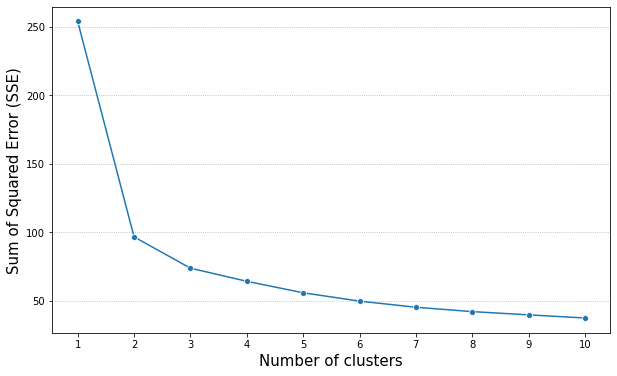

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=range(1,max_cluster+1), y=SSE, palette='Blues', marker='o')
plt.xlabel('Number of clusters', size=15)
plt.ylabel('Sum of Squared Error (SSE)', size=15)
plt.xticks(range(1,11))
plt.grid(axis='y', linestyle=':')
plt.show()

Demonstrated as in the graph, the optimal number of clusters we should choose is **2** in that further increasing of this number will not lead to a significant descent in sum of squared error (SSE).

In [33]:
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=123)
kmeans_result = kmeans.fit_predict(df2)
# df_temp = pd.DataFrame({'K-means': kmeans_result})
# df2 = df2.join(df_temp)
# df2

In [34]:
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score

print('Silhouette_score: ', silhouette_score(df2, kmeans_result))
print('Davies-Bouldin Score: ', davies_bouldin_score(df2, kmeans_result))

Silhouette_score:  0.6051160370641218
Davies-Bouldin Score:  0.6405850741601111


## 2. Gaussian Mixture Model

Tunning the number of clusters via the Bayesian information criterion, namely BIC.

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


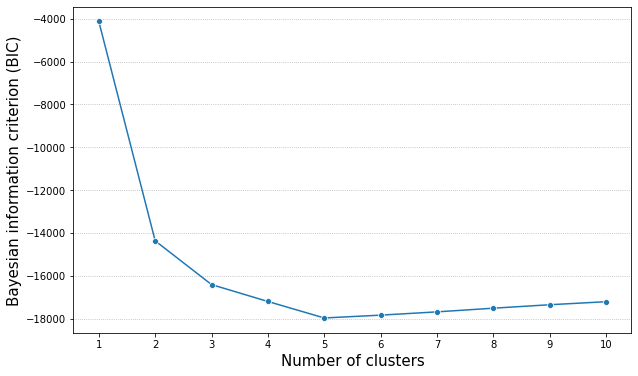

In [36]:
from sklearn.mixture import GaussianMixture

# set the iteration limit for maximum number of clusters
max_cluster = 10

# initialize bic
BIC = []

for i in range(1,max_cluster+1):
    gmm = GaussianMixture(n_components = i, random_state=123)
    gmm = gmm.fit(df3)
    BIC.append(gmm.bic(df3))

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=range(1,max_cluster+1), y=BIC, palette='Blues', marker='o')
plt.xlabel('Number of clusters', size=15)
plt.ylabel('Bayesian information criterion (BIC)', size=15)
plt.xticks(range(1,11))
plt.grid(axis='y', linestyle=':')
plt.show()

Demonstrated as in the graph, the optimal number of clusters we should choose is 5 since a lower Bayesian information criterion (BIC) is better.

In [37]:
gmm = GaussianMixture(n_components = 5, random_state=123)
gmm_result = gmm.fit_predict(df3)

In [43]:
print('Silhouette_score: ', silhouette_score(df3, gmm_result))
print('Davies-Bouldin Score: ', davies_bouldin_score(df3, gmm_result))

Silhouette_score:  0.20169809736822528
Davies-Bouldin Score:  1.604994245785305


### Performance Assessment (unsupervised learning)

The **Silhouette Score** measures the distance between *each data point*, *the centroid of the cluster it was assigned to* and *the closest centroid belonging to another cluster*. The higher silhouette score means less overlapping of different clusters which is better.

The Davies-Bouldin score evaluates intra-cluster similarity and inter-cluster differences, i.e. the ratio between the cluster scatter and the cluster's separation. A lower value indicates that the clustering is better.

Compared two clustering methods, K-means clustering has a higher Silhouette score 0.6051 > 0.2017 (GMM) and a lower Davies-Bouldin score 0.6406 < 1.605 (GMM). In closing, the **K-means clustering** outperforms the Gaussian Mixture Model.